## Importing the libraries

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import joblib

## Importing the dataset

In [2]:
dataset = pd.read_csv('temp_based_regression.csv')

# Exploartory data analysis

In [3]:
dataset.shape

(698649, 12)

In [4]:
dataset.head(2)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,-2.522071
1,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,-2.522673


In [5]:
dataset.tail(2)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
698647,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.25564,1.029191,-0.245701,1.002906,0.833936,0.492666,0.429439
698648,-0.043803,0.312666,0.330829,-1.246590,-1.222431,-0.25564,1.029141,-0.245722,0.987163,0.828046,0.489382,0.429166


In [6]:
dataset.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
count,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000
mean,-0.003129,0.004779,0.004275,-0.005819,-0.006024,-0.002985,0.005794,-0.002809,0.000623,-0.002212,-0.003988,-0.004385
std,0.992710,1.002086,0.997729,1.002404,1.001700,0.997403,0.999005,0.997375,1.001119,0.999732,0.998443,0.995450
min,-7.968341,-1.367800,-1.654878,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-1.834688,-2.066143,-2.019973,-2.631991
25%,-0.598182,-1.037856,-0.827631,-0.927994,-0.951892,-0.266604,-0.756753,-0.257268,-0.747074,-0.761951,-0.725651,-0.671621
50%,0.266325,-0.176651,0.267501,-0.099512,-0.140246,-0.187167,0.213188,-0.188490,-0.057264,0.005240,0.006893,0.094138
75%,0.686697,0.648482,0.358460,0.852677,0.855411,0.547458,1.013975,0.499623,0.697432,0.772349,0.725208,0.680431
max,2.967117,2.649032,2.274734,1.793498,2.024151,3.016895,1.060937,2.914185,2.449158,2.326668,2.651810,2.917456


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698649 entries, 0 to 698648
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         698649 non-null  float64
 1   coolant         698649 non-null  float64
 2   u_d             698649 non-null  float64
 3   u_q             698649 non-null  float64
 4   motor_speed     698649 non-null  float64
 5   torque          698649 non-null  float64
 6   i_d             698649 non-null  float64
 7   i_q             698649 non-null  float64
 8   stator_yoke     698649 non-null  float64
 9   stator_tooth    698649 non-null  float64
 10  stator_winding  698649 non-null  float64
 11  pm              698649 non-null  float64
dtypes: float64(12)
memory usage: 64.0 MB


In [8]:
dataset.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_tooth', 'stator_winding', 'pm'],
      dtype='object')

## Plot

### HISTOGRAM to check the data is normally distributed

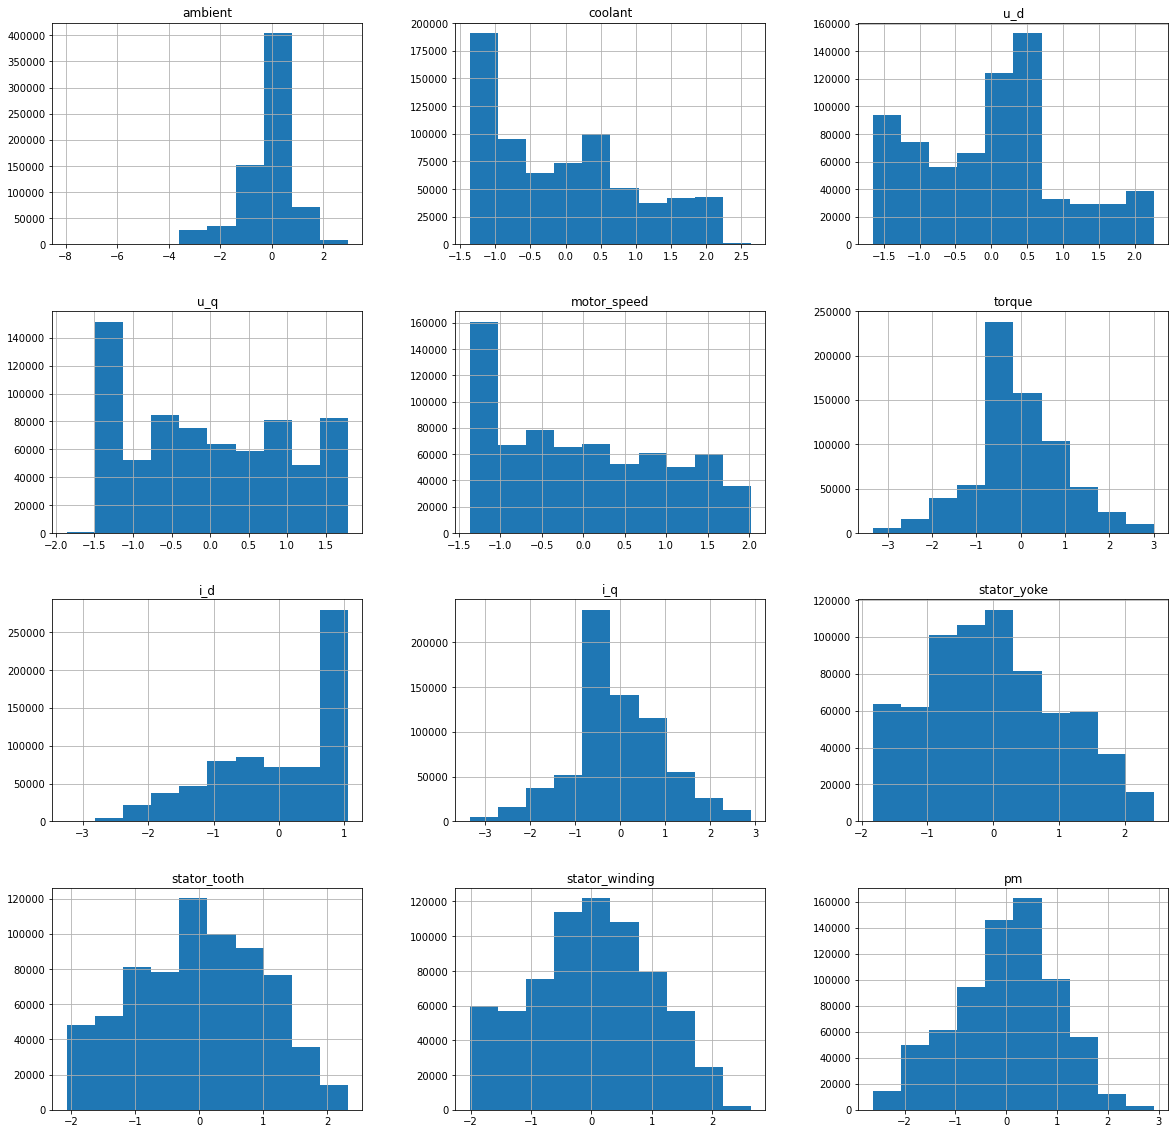

In [9]:
dataset.hist(figsize = (20,20))
plt.show()

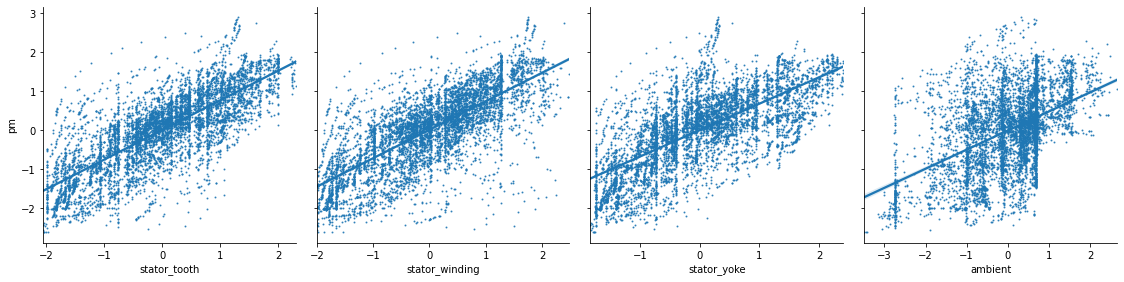

In [10]:
g = sns.PairGrid(dataset.sample(frac=0.01), y_vars=["pm"],
                 x_vars=["stator_tooth", "stator_winding", "stator_yoke", "ambient"], height=4, palette="GnBu_d")

g.map(sns.regplot, scatter_kws={'s':1});

In [11]:
column = ["stator_tooth", "stator_winding", "stator_yoke", "ambient"]

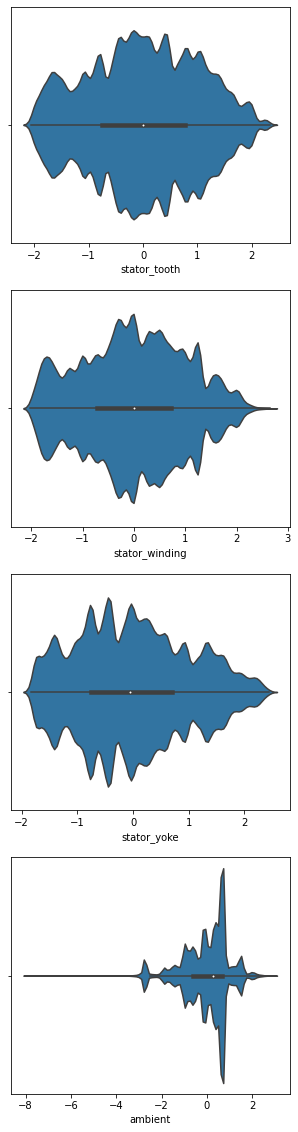

In [12]:
fig, axes = plt.subplots(nrows=4, figsize=(5,20))
fig.subplots_adjust(hspace=0.2)

for (ax, i) in zip(axes, column):
    sns.violinplot(x=dataset[i], ax=ax)
    plt.plot()

## Missing Data

In [13]:
dataset.isnull()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
698644,False,False,False,False,False,False,False,False,False,False,False,False
698645,False,False,False,False,False,False,False,False,False,False,False,False
698646,False,False,False,False,False,False,False,False,False,False,False,False
698647,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

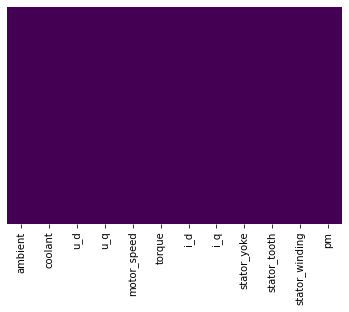

In [14]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
dataset.isnull().sum().sort_values(ascending=False)

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
stator_yoke       0
stator_tooth      0
stator_winding    0
pm                0
dtype: int64

## correlation

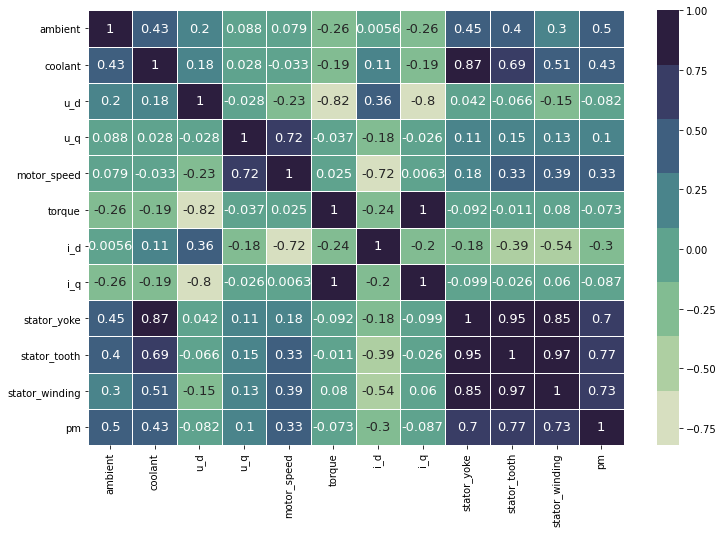

In [16]:
# checking the correlation (Pearson's coeff)
corr_matrix = dataset.corr()
f,ax  = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,linewidths=.5,annot_kws={"size": 13}, ax=ax, cmap = sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.show()

### Select only those variable who have high linear correlation with all the variables

In [19]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                ambient  coolant       u_d       u_q  motor_speed    torque  \
ambient             NaN  0.43407  0.195035  0.087877     0.078842 -0.262591   
coolant             NaN      NaN  0.178710  0.027681    -0.032963 -0.189276   
u_d                 NaN      NaN       NaN -0.027819    -0.234200 -0.821098   
u_q                 NaN      NaN       NaN       NaN     0.717111 -0.037028   
motor_speed         NaN      NaN       NaN       NaN          NaN  0.024583   
torque              NaN      NaN       NaN       NaN          NaN       NaN   
i_d                 NaN      NaN       NaN       NaN          NaN       NaN   
i_q                 NaN      NaN       NaN       NaN          NaN       NaN   
stator_yoke         NaN      NaN       NaN       NaN          NaN       NaN   
stator_tooth        NaN      NaN       NaN       NaN          NaN       NaN   
stator_winding      NaN      NaN       NaN       NaN          NaN       NaN   
pm                  NaN      NaN       NaN       NaN

In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['i_q', 'stator_winding']


## Detecting Multicollinearity with VIF

In [21]:
iv = dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
       'torque', 'i_d', 'i_q', 'stator_yoke', 'stator_tooth',
       'stator_winding']].columns
X = dataset[iv]

  
# compare with each columns
[vif(dataset[iv].values, index) for index in range(len(iv))] 
 
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(dataset[iv].values, index) for index in range(len(iv))] 
    maxvif = max(vif_list)
    print("Max VIF value is ", maxvif)                      
    drop_index = vif_list.index(maxvif)
    print("For Independent variable", iv[drop_index])
     
    if maxvif > 20:
         
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
        print("Final Independent_variables ", iv)

Max VIF value is  624.4600554313168
For Independent variable stator_tooth
Deleting stator_tooth
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_winding'],
      dtype='object')
Max VIF value is  261.6854342930114
For Independent variable torque
Deleting torque
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q',
       'stator_yoke', 'stator_winding'],
      dtype='object')
Max VIF value is  73.39193135510105
For Independent variable stator_yoke
Deleting stator_yoke
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q',
       'stator_winding'],
      dtype='object')
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10

## Outlier analysis

In [22]:
def outlier_label(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        
        return 'No'

In [23]:
columns_to_check = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed','torque', 'i_d', 'i_q', 'stator_yoke', 'stator_tooth','stator_winding']

for col in columns_to_check:
    quartile_01, quartile_03 = np.percentile(dataset[col], [25, 75])
    iqr = quartile_03 - quartile_01
    
    lower_bound = quartile_01 -(1.5 * iqr)
    upper_bound = quartile_03 +(1.5 * iqr)
    
    dataset['outlier'] = dataset[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'ambient' respectively is: -2.5254989 and 2.6140139000000002
The lower and upper bound of the range for 'coolant' respectively is: -3.56736355 and 3.17798965
The lower and upper bound of the range for 'u_d' respectively is: -2.6067676 and 2.1375972
The lower and upper bound of the range for 'u_q' respectively is: -3.599002325 and 3.5236853949999998
The lower and upper bound of the range for 'motor_speed' respectively is: -3.66284595 and 3.5663650099999997
The lower and upper bound of the range for 'torque' respectively is: -1.48769742 and 1.76855114
The lower and upper bound of the range for 'i_d' respectively is: -3.41284475 and 3.6700668500000004
The lower and upper bound of the range for 'i_q' respectively is: -1.39260407 and 1.63495905
The lower and upper bound of the range for 'stator_yoke' respectively is: -2.91383205 and 2.86418995
The lower and upper bound of the range for 'stator_tooth' respectively is: -3.0633999000000003 and 3.07379

# Create a model and train it

In [24]:
# choosing all features

X_1=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
           'torque', 'i_d', 'i_q','stator_yoke', 'stator_tooth','stator_winding']]

y_1= dataset[['pm']]

## Scaling features

In [25]:
ss = preprocessing.StandardScaler()

In [26]:
X_1= ss.fit_transform(X_1)

## Splitting the dataset into the Training set and Test set

In [27]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

## Random Forest Regression

## 1st model

In [28]:
# Fitting Random Forest Regression to the Training set

regressor_1 = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion= 'mse',oob_score= False,random_state=42)

regressor_1.fit(X_1_train, y_1_train)

# Predicting the Test set results
y_pred = regressor_1.predict(X_1_test)

score=r2_score(y_1_test,y_pred)

print("accuracy score",score)

<ipython-input-28-5e6bd928a25d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_1.fit(X_1_train, y_1_train)


accuracy score 0.9986515016568971


In [29]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','-0.2501821','1.0295724','-0.24586003','-1.8314217','-2.0661428','-2.0180326']]

# Predicting the Test set results
y_pred_new = regressor_1.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [-2.52301236]


In [30]:
# 1st record
#actual = -2.522071 # predicted = 2.52301236

In [31]:
X_test=[['-0.1533763','0.4364797','2.233154','-0.7633086','0.8685327','-1.703007','-1.886732','-1.511974','0.6045675','0.6515232','0.581081']]

# Predicting the Test set results
y_pred_new = regressor_1.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new) # actual 

pridicted values of pm based on given variables [0.99597901]


In [32]:
# actual = 1.003159 # predicted = 0.99597901

In [33]:
X_test=[['-0.6825343','-1.1113616','0.33556557','-1.3032398','-1.2224305','-0.24751255','1.0292736','-0.2457751','-1.8320305','-2.061756','-2.0172567']]

# Predicting the Test set results
y_pred_new = regressor_1.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [-2.52987322]


In [34]:
## 10th record 
#actual = -2.5219264
#predicted = 2.52987322]


In [35]:
X_test=[['-0.94108576','-1.0927658','0.18758412','1.6735045','2.0241187','-0.26747477','-0.861884','-0.2565046','-1.7467443','-1.7932686','-1.6809596']]

# Predicting the Test set results
y_pred_new = regressor_1.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [-2.33626759]


In [36]:
## 100th record 
#actual = -2.303665
#predicted = -2.33626759


In [37]:

X_test=[['-0.04380252','0.3126659','0.3308295','-1.24659','-1.222431','-0.2556397','1.029141','-0.2457223','0.9871625','0.8280457','0.4893824']]

# Predicting the Test set results
y_pred_new = regressor_1.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [0.513868]


In [38]:
## last record 
#actual = 0.4291662
#predicted = 0.513868

## Important Variable

In [50]:
X_var = dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
           'torque', 'i_d', 'i_q','stator_yoke', 'stator_tooth','stator_winding']]

[0.09839001 0.07074315 0.01764669 0.03843336 0.04454445 0.02863982
 0.03284178 0.0140473  0.03143527 0.59915901 0.02411916]


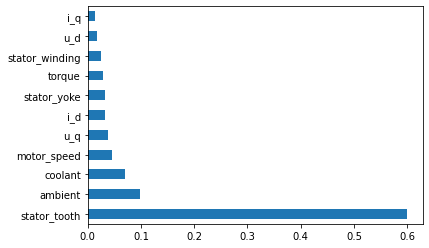

In [51]:
print(regressor_1.feature_importances_) 
feat_importances = pd.Series(regressor_1.feature_importances_, index=X_var.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

## Saving model file

In [52]:
joblib.dump(regressor_1, 'regression_model_random_forest.pkl')

['regression_model_random_forest.pkl']

### 2nd model

In [39]:
# features based on correlation analysis

X_2=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
       'torque', 'i_d', 'stator_yoke', 'stator_tooth']]

y_2= dataset[['pm']]

In [40]:
X_2= ss.fit_transform(X_2)

In [41]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

In [42]:
# Fitting Random Forest Regression to the Training set

regressor_2 = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion= 'mse',oob_score= False,random_state=42)

regressor_2.fit(X_2_train, y_2_train)

# Predicting the Test set results
y_pred = regressor_2.predict(X_2_test)

#from sklearn.metrics import r2_score
score=r2_score(y_2_test,y_pred)

print("accuracy score",score)

<ipython-input-42-06385d3f994b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_2.fit(X_2_train, y_2_train)


accuracy score 0.9983925219657362


In [43]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','-0.2501821','1.0295724','-1.8314217','-2.0661428']]

# Predicting the Test set results
y_pred_new = regressor_2.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [-2.52596274]


## 3rd Model

In [44]:
# features based on Multi-collinearity

X_3=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q','stator_winding']]

y_3= dataset[['pm']]

In [45]:
X_3= ss.fit_transform(X_3)

In [46]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 100)

In [47]:
# Fitting Multiple Linear Regression to the Training set

regressor_3 = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion= 'mse',oob_score= False,random_state=42)
regressor_3.fit(X_3_train, y_3_train)

# Predicting the Test set results
y_pred = regressor_3.predict(X_3_test)

#from sklearn.metrics import r2_score
score=r2_score(y_3_test,y_pred)

print("accuracy score",score)

<ipython-input-47-ab27785aade7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_3.fit(X_3_train, y_3_train)


accuracy score 0.9968091121584026


In [48]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','1.0295724','-0.24586003','-2.0180326']]

# Predicting the Test set results
y_pred_new = regressor_3.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [-2.5219964]
